In [306]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
import math
import yfinance as yf
import scipy.optimize
from scipy import stats


In [307]:
#read list of tickers from a csv file and print them out
tickers_file = 'TechTickers_2.csv'
tickers = []
f = open(tickers_file,"r",encoding='utf-8-sig')
for line in csv.reader(f):
    tickers.append(str(line[0]))
f.close
tickers_str = tickers[0]
for s in tickers[1:]: tickers_str=tickers_str+", "+s
start_date = '2014-01-01'
end_date = '2022-01-01'
stock_data = yf.download(tickers_str, start_date, end_date)
#print(stock_data.head(10))
#print(len(stock_data))

[*********************100%***********************]  30 of 30 completed


In [308]:
# Looks like SNE and MXIM do not display values entirely, then we remove it from the data
stockArray = []
for ticker in tickers:
    stockArray.append(list(stock_data['Adj Close'][ticker]))
stockArray=np.array(stockArray)
tickers_liq = []
for i in range(len(tickers)):
    temp=0
    for j in range(len(stockArray[i,:])):
        if math.isnan(stockArray[i,j]):
            temp=1
    if (temp==0):
        tickers_liq.append(tickers[i])
print(len(tickers_liq))
print(tickers_liq)
stock_data = yf.download(tickers_liq, start_date, end_date)

30
['AAPL', 'MSFT', 'INTC', 'CSCO', 'ADBE', 'NVDA', 'ASML', 'TXN', 'INTU', 'AMAT', 'ADI', 'LRCX', 'CTSH', 'KLAC', 'MCHP', 'XLNX', 'VRSN', 'ANSS', 'SNPS', 'SWKS', 'CDNS', 'FTNT', 'CHKP', 'STX', 'SSNC', 'CTXS', 'AKAM', 'NTAP', 'OTEX', 'JKHY']
[*********************100%***********************]  30 of 30 completed


In [309]:
# Question 1a
price = stock_data['Adj Close'].values
ret = price[1:]/price[:-1] - 1
#print(price)
#print(len(ret))
mu = np.mean(ret,axis=0)*250
sigma = np.cov(np.transpose(ret))*250
print(mu)
print()
print(sigma)

[0.32714688 0.32545793 0.22551466 0.1661713  0.35796316 0.22821821
 0.33010827 0.36315891 0.09958138 0.19231401 0.11999506 0.12307364
 0.43144896 0.16072588 0.3129759  0.16617838 0.35193887 0.40950979
 0.25226071 0.32641943 0.18396524 0.63515064 0.14157472 0.30754092
 0.21307612 0.21696512 0.3025405  0.24684839 0.21097283 0.26757319]

[[0.07888221 0.04827682 0.04601491 0.03116738 0.05621217 0.04423491
  0.04806014 0.04476253 0.02596318 0.03709856 0.03581336 0.02943104
  0.04497438 0.04361556 0.04418863 0.02542603 0.05449151 0.05885149
  0.05313929 0.04757556 0.04089114 0.06318825 0.03134421 0.04182683
  0.03767239 0.04004112 0.06477847 0.04469758 0.03452718 0.04345159]
 [0.04827682 0.09011503 0.05006363 0.03983992 0.06077518 0.05603833
  0.05412594 0.05625823 0.03400288 0.03870892 0.04092095 0.0373112
  0.0611295  0.04617751 0.05598793 0.03120132 0.0571721  0.05975297
  0.05580626 0.05612814 0.04076612 0.0728192  0.03812712 0.05330821
  0.04748003 0.03840437 0.0574995  0.04726637 0.043

In [310]:
# Question 1b

# Method 1
A = 2*sigma
row = [1 for i in range(len(sigma))]
A = np.vstack([A,row])
A2 = [-1 for i in range(len(sigma))]
A2 = np.append(A2,[0],axis=0)
A = np.c_[A,A2]
#print(A)
b = [0 for i in range(len(sigma))]
b = np.append(b,[1],axis=0)
#print(b)
alpha_min_variance = np.linalg.solve(A,b)
print(alpha_min_variance)

# Method 2
alpha_min_variance_2 = np.linalg.solve(sigma,np.ones(len(sigma)))
alpha_min_variance_2 = alpha_min_variance_2/np.sum(alpha_min_variance_2)
print(alpha_min_variance_2)
#np.sum(alpha_min_variance_2)

[ 0.109132   -0.10223886  0.07912971  0.02440582 -0.01039185 -0.05852131
  0.09320082 -0.02982641  0.26880846  0.08139476  0.01798878  0.11094029
 -0.04014704  0.02974078 -0.04708663  0.30246311 -0.04038832 -0.09756682
 -0.06704277 -0.02038522  0.00059134 -0.0782279   0.13729767  0.1366923
  0.02578847  0.01179619 -0.08245165  0.0867309   0.0889549   0.0692185
  0.05148103]
[ 0.109132   -0.10223886  0.07912971  0.02440582 -0.01039185 -0.05852131
  0.09320082 -0.02982641  0.26880846  0.08139476  0.01798878  0.11094029
 -0.04014704  0.02974078 -0.04708663  0.30246311 -0.04038832 -0.09756682
 -0.06704277 -0.02038522  0.00059134 -0.0782279   0.13729767  0.1366923
  0.02578847  0.01179619 -0.08245165  0.0867309   0.0889549   0.0692185 ]


In [311]:
# Question 1c
# Method 1
gamma = 2
A_bis = 2*gamma*sigma
row = [1 for i in range(len(sigma))]
A_bis = np.vstack([A_bis,row])
A2_bis = [1 for i in range(len(sigma))]
A2_bis = np.append(A2_bis,[0],axis=0)
A_bis = np.c_[A_bis,A2_bis]
#print(A)
b_bis = mu
b_bis = np.append(b_bis,[1],axis=0)
#print(b)
alpha_min_variance_gamma = np.linalg.solve(A_bis,b_bis)
alpha_min_variance_gamma = alpha_min_variance_gamma[:-1]
print(alpha_min_variance_gamma)

[ 0.4343236  -0.03994129 -0.34077165 -0.11072285 -0.14005542 -0.44827573
  0.12238689  0.50745361 -0.43798734  0.05853983 -0.31602999 -0.22803368
  0.48150732 -0.48835745  0.21478865  0.23125824  0.07752229  0.39235058
 -0.32079664  0.7415033  -0.02401641  0.61637428 -0.18722198  0.10913111
 -0.00122937  0.05629033 -0.12546023  0.2440596  -0.00658884 -0.07200076]


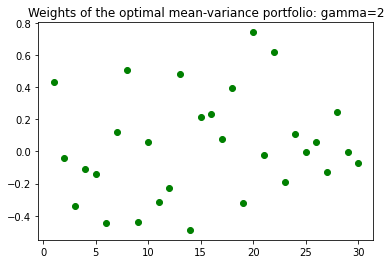

Mean:  0.999436306866461
Variance:  0.2545055515431171
Std:  0.5044854324389527


In [312]:
# Plot the portfolio weights
plt.scatter(range(1,len(sigma)+1),alpha_min_variance_gamma,c='green')
plt.title('Weights of the optimal mean-variance portfolio: gamma=2')
plt.show()
mean_portfolio = mu@alpha_min_variance_gamma
variance_portfolio = alpha_min_variance_gamma@sigma@alpha_min_variance_gamma
print('Mean: ',mean_portfolio)
print('Variance: ',variance_portfolio)
print('Std: ',np.sqrt(variance_portfolio))

In [313]:
def my_obj(alpha,epsilon,sigma,mu):
    return -(alpha@mu -np.abs(alpha)@epsilon -2*(alpha@sigma@alpha))

In [314]:
def my_constr(x):     
    return np.sum(x) - 1

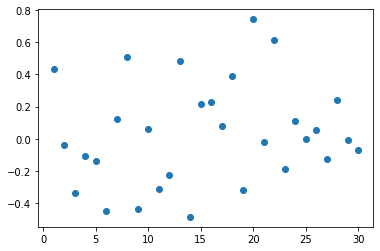

Mean:  0.9994965474205818
Variance:  0.2545363884578807
Std:  0.5045159942537805


In [315]:
# Check of the values previously obtained
# Method 2
x0 = np.ones(len(sigma))/len(sigma)
obj = lambda alpha : -(alpha@mu-gamma*(alpha@sigma@alpha))
constr = {'type': 'eq', 'fun': lambda alpha : my_constr(alpha)}
opt = scipy.optimize.minimize(obj, x0, constraints=constr, options={'maxiter':1e6})

plt.scatter(range(1,len(sigma)+1),opt.x)
plt.show()
mean_portfolio_2 = mu@opt.x
variance_portfolio_2 = opt.x@sigma@opt.x
print('Mean: ',mean_portfolio_2)
print('Variance: ',variance_portfolio_2)
print('Std: ',np.sqrt(variance_portfolio_2))

In [316]:
# Question 1d

epsilon = np.diag(sigma)**.5

x0 = np.ones(len(sigma))/len(sigma)
obj = lambda alpha : my_obj(alpha,epsilon,sigma,mu)
constr = {'type': 'eq', 'fun': lambda alpha : my_constr(alpha)}
opt1 = scipy.optimize.minimize(obj, x0, constraints=constr, options={'maxiter':1e6})


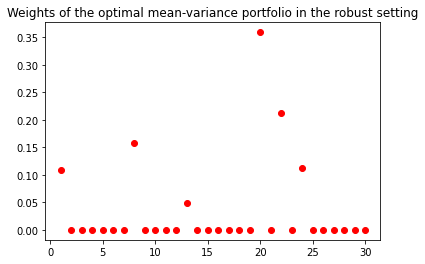

Mean:  0.40081401524821736
Variance:  0.2539751555587822
Std:  0.2539751555587822
Worst case mean:  0.09242300215506609
Best case mean:  0.7092050283413687


In [317]:
# Plot the portfolio weights
plt.scatter(range(1,len(sigma)+1),opt1.x,c='r')
plt.title('Weights of the optimal mean-variance portfolio in the robust setting')
plt.show()
mean_portfolio = mu@opt1.x
variance_portfolio = opt1.x@sigma@opt1.x
print('Mean: ',mean_portfolio)
print('Variance: ',np.sqrt(variance_portfolio))
print('Std: ',np.sqrt(variance_portfolio))
print('Worst case mean: ',opt1.x@(mu-epsilon))
print('Best case mean: ',opt1.x@(mu+epsilon))

[[ 0.15776443  0.09655365  0.09202982 ...  0.08690317 -0.32714688
  -1.        ]
 [ 0.09655365  0.18023006  0.10012727 ...  0.10547208 -0.32545793
  -1.        ]
 [ 0.09202982  0.10012727  0.17958935 ...  0.13561243 -0.22551466
  -1.        ]
 ...
 [ 0.08690317  0.10547208  0.13561243 ...  0.23556579 -0.26757319
  -1.        ]
 [ 1.          1.          1.         ...  1.         -0.
   0.        ]
 [ 0.32714688  0.32545793  0.22551466 ...  0.26757319 -0.
   0.        ]]
[0.16638979 0.16392913 0.16210652 0.16094364 0.16045481 0.16064621
 0.16151542 0.16305158 0.16523611 0.16804371 0.17144379 0.17540188
 0.17988116 0.18484375 0.19025182 0.19606851 0.20225858 0.20878882
 0.21562832 0.2227486  0.2301236  0.23772961 0.24554517 0.25355089
 0.26172934 0.27006481 0.27854322 0.28715189 0.29587947 0.30471573
 0.31365149 0.32267848 0.33178926 0.3409771  0.35023596 0.35956033
 0.36894525 0.37838622 0.38787915 0.3974203  0.4070063  0.41663404
 0.42630069 0.43600367 0.44574061 0.45550932 0.46530782

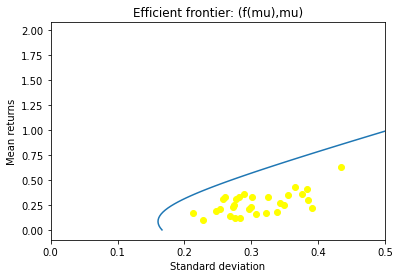

In [318]:
# Question 1e

# First, we need the vector of mu that we must give to resolve the system
tab_test_mu = [i for i in np.arange(0,2,0.02)]
#print(len(tab_mu))

A_eff_frontier = 2*sigma
row = [1 for i in range(len(sigma))]
A_eff_frontier = np.vstack([A_eff_frontier,row])
A_eff_frontier = np.vstack([A_eff_frontier,mu])

mu_eff = mu
mu_eff = np.append(mu,[0,0])
A_eff_frontier = np.c_[A_eff_frontier,-mu_eff]

A2_eff = [-1 for i in range(len(sigma))]
A2_eff = np.append(A2_eff,[0,0],axis=0)
A_eff_frontier = np.c_[A_eff_frontier,A2_eff]
print(A_eff_frontier)

tab_result = []
for i in range(0,len(tab_test_mu)):
    b_eff = [0 for j in range(len(sigma))]
    b_eff = np.append(b_eff,[1,tab_test_mu[i]],axis=0)
    res = np.linalg.solve(A_eff_frontier,b_eff)
    res = res[:-2]
    res = (res@sigma@res)**0.5
    tab_result = np.append(tab_result,res)

print(tab_result)
plt.plot(tab_result,tab_test_mu)
plt.scatter(np.diag(sigma)**0.5,mu,c='yellow')
plt.xlim([0,0.50])
plt.title('Efficient frontier: (f(mu),mu)')
plt.xlabel('Standard deviation')
plt.ylabel('Mean returns')
plt.show()

In [319]:
def omf_mean(x,R,mu_omf):
    return x*R + (1-x)*mu_omf

In [320]:
def omf_var(x,var_omf):
    return np.abs(1-x)*var_omf

[ 0.55930846 -0.0159977  -0.50215746 -0.1626585  -0.1898906  -0.59807481
  0.13360432  0.71395301 -0.70963881  0.04975571 -0.44440751 -0.35831569
  0.68200112 -0.68748448  0.31543838  0.2038912   0.12284032  0.58064652
 -0.41832497  1.03432923 -0.0334742   0.88333923 -0.31194859  0.09853818
 -0.01161347  0.0733913  -0.14199025  0.30452767 -0.04331033 -0.12627728
  0.        ]
Mean:  1.3511325540021273
Std:  0.6812830573137769
Sharpe Ratio:  1.9685394192687886


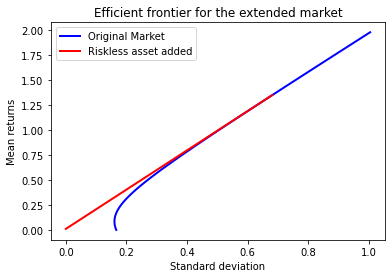

In [321]:
# Question 1f

# Add a riskless asset to the set of available ones
R = 0.01
mu_vect = np.append(mu,[R])

sigma_omf = sigma
risk_row = [0 for i in range(len(sigma_omf))]
risk_col = [0 for i in range(len(sigma_omf) + 1)]
sigma_omf = np.vstack([sigma_omf, risk_row])
sigma_omf = np.c_[sigma_omf, risk_col]

# Optimal Mutual fund
b_omf = mu - R
optimal_mutual_fund = np.linalg.solve(sigma,b_omf)
optimal_mutual_fund = optimal_mutual_fund/np.sum(optimal_mutual_fund)
optimal_mutual_fund = np.append(optimal_mutual_fund,[0])
print(optimal_mutual_fund)

mean_omf = optimal_mutual_fund@mu_vect
var_omf = (optimal_mutual_fund@sigma_omf@optimal_mutual_fund)**0.5
sharpe_ratio = (mean_omf - R)/var_omf
print('Mean: ',mean_omf)
print('Std: ',var_omf)
print('Sharpe Ratio: ',sharpe_ratio)

plt.plot(tab_result,tab_test_mu, 'b-',lw=2, label='Original Market')
plt.plot([0, var_omf], [R, mean_omf], 'r-', lw=2,label='Riskless asset added')
plt.title('Efficient frontier for the extended market')
plt.xlabel('Standard deviation')
plt.ylabel('Mean returns')
plt.legend(loc="upper left")
plt.show()

[0.23647691 0.23521756 0.16069602 0.11644732 0.25945471 0.16271189
 0.23868504 0.26332886 0.06679532 0.13594034 0.08201654 0.08431206
 0.31424855 0.11238701 0.22591048 0.11645261 0.25496277 0.29788986
 0.1806389  0.2359345  0.12971517 0.46613635 0.09810717 0.22185795
 0.15142137 0.15432115 0.21812945 0.17660327 0.14985307 0.19205648]


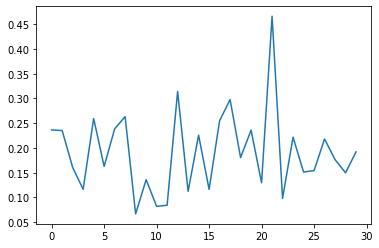

In [322]:
# Question 2a
tab_beta = []
for i in range(len(sigma_omf)):
    S = 0
    for j in range(len(sigma_omf)):
        S += sigma_omf[i][j] * optimal_mutual_fund[j]
    #S = S / (var_omf**2)
    S = S/(optimal_mutual_fund@sigma_omf@optimal_mutual_fund)
    tab_beta = np.append(tab_beta,S)

print(tab_beta[:-1])
plt.plot(tab_beta[:-1])

[0.23647690771929955, 0.2352175631348039, 0.16069601935998937, 0.11644732403633713, 0.2594547147442752, 0.16271188525384422, 0.23868503617702092, 0.26332885894853947, 0.0667953191010352, 0.13594033788653426, 0.08201654489245462, 0.08431205682653796, 0.3142485501614477, 0.11238701393487446, 0.22591048186153168, 0.1164526063706547, 0.2549627702764114, 0.297889861137628, 0.18063889962494248, 0.23593449674128913, 0.12971517496698529, 0.4661363539691932, 0.09810717281792775, 0.22185794910649362, 0.15142136619884544, 0.1543211525645765, 0.2181294484890924, 0.1766032677218534, 0.1498530726979811, 0.192056476902011]

[4.336808689942018e-19, 8.673617379884035e-19, 6.505213034913027e-19, 8.673617379884035e-19, 1.0842021724855044e-18, 9.75781955236954e-19, 1.951563910473908e-18, 2.168404344971009e-19, 3.2526065174565133e-19, 5.421010862427522e-19, 1.5720931501039814e-18, 9.215718466126788e-19, 8.673617379884035e-19, 7.589415207398531e-19, 2.168404344971009e-19, 1.3010426069826053e-18, 1.517883041

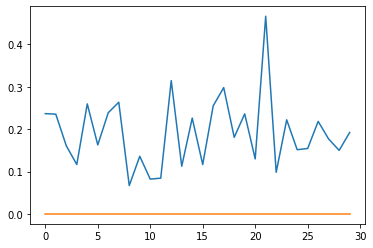

In [323]:
# Question 2b
r_m = ret@optimal_mutual_fund[:-1]
betas=[]
alphas=[]
for i in range(len(ret[0])):
    slope, intercept, r_value, p_value, std_err = stats.linregress(r_m-R/250, ret[:,i]-R/250)
    #slope, intercept, r_value, p_value, std_err = stats.linregress(ret_mp, ret[:,i]-R)
    betas.append(slope)
    alphas.append(intercept)
print(betas)
plt.plot(betas)
print()
print(alphas)
plt.plot(alphas)
#plt.scatter(alphas,betas)
plt.show()

In [324]:
# Question 2c
tickers_file = 'TechTickers_2.csv'
tickers = []
f = open(tickers_file,"r",encoding='utf-8-sig')
for line in csv.reader(f):
    tickers.append(str(line[0]))
f.close
factors_file = 'Factors.csv'
factors = []
f = open(factors_file,"r",encoding='utf-8-sig')
for line in csv.reader(f):
    factors.append([float(line[i]) for i in range(len(line))])
f.close

<function TextIOWrapper.close()>

In [332]:
res_all = []
mu_annual_all = []
ret_all = []
F_annual_all = []
tab_pvalues = []
tab_Rvalues  = []
tab_bi = []
tab_ci = []
for ind in range(30):
    ticker = tickers[ind]
    #downoad the prices and volumes for the previously read list of tickers
    start_date = "2014-01-01"
    end_date = "2022-01-01"
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    #compute the returns
    price = stock_data['Adj Close'].values
    ret = price[1:]/price[:-1] - 1
    #create a list of daily and annual values for the factor and returns
    F = []
    F_annual = []
    ret1 = []
    ret_annual = []
    cntr=0
    j=1
    temp = 0
    for i in range(0,len(ret)):
        if (j<len(factors[ind])):
            F.append((factors[ind][j]-factors[ind][j-1])/100)
            ret1.append(ret[i])
            if (cntr==250):
                cntr=0
                ret_annual.append(temp)
                F_annual.append((factors[ind][j]-factors[ind][j-1])/100)
                temp=0
                j+=1
            temp+=ret[i]
            cntr+=1

    #print(F_annual)
    #print(ret_annual)
    #regression for annual returns
    slope, intercept, r_value, p_value, std_err = stats.linregress(F_annual, ret_annual)
    tab_pvalues.append(p_value)
    tab_Rvalues.append(r_value)
    tab_bi.append(intercept)
    tab_ci.append(slope)

    res = [ret1[i] - (intercept + slope*F[i])/250 for i in range(len(F))]
    res_all.append(res)
    mu_annual_all.append([intercept + slope*F_annual[i] for i in range(len(F_annual))])
    ret_all.append(ret1)
    F_annual_all.append(F_annual)

print("P-values: ")
print(tab_pvalues)
print()
print("R-values: ")
print(tab_Rvalues)
print()
print("bi coefficients: ")
print(tab_bi)
print()
print("ci coeffifients: ")
print(tab_ci)
print()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [334]:
# Method 2 for Question 2c
# Fs_array = np.zeros(shape=(len(tickers),len(factors[0][:])-2))
# for i in range(len(tickers)):
#     Fs = []
#     for j in range(2,len(factors[0][:])):
#         temp = factors[i][j-1]-factors[i][j-2]
#         Fs.append(temp)
#     Fs_array[i][:] = Fs
#
# Fs_array = Fs_array/100
# Fs_array = np.array(Fs_array)
# print(Fs_array)
#
# ret_annual_tab = []
# for k in range(2014,2022):
#     start_year = "%i-01-01" % k
#     end_year = "%i-01-01" % (k+1)
#     ret_annual_df = stock_data[start_year:end_year]
#     ret_annual_df = ret_annual_df['Adj Close'].values
#     print(ret_annual_df)
#     list_inter = []
#     for i in range(len(tickers)):
#         temp = (ret_annual_df[-1,i]/ret_annual_df[0,i])-1
#         list_inter.append(temp)
#     ret_annual_tab.append(list_inter)
#
# ret_annual_tab = np.array(ret_annual_tab)
# print(ret_annual_tab)
#
# bi_coeff=[]
# ci_coeff=[]
# pvalues=[]
# Rvalues=[]
# for i in range(len(tickers)):
#     slope, intercept, r_value, p_value, std_err = stats.linregress(Fs_array[i,:],ret_annual_tab[:,i])
#     ci_coeff.append(slope)
#     bi_coeff.append(intercept)
#     pvalues.append(p_value)
#     Rvalues.append((r_value))
#
# print(pvalues)
# print()
# print(Rvalues)
# print()
# print(bi_coeff)
# print()
# print(ci_coeff)

In [345]:
# Question 2d

R = 0.01
mu_list = []
#print(mu_annual_all)
Sigma = np.cov(np.array(res_all)) * 250
for i in range(len(mu_annual_all)):
    mu_list.append(mu_annual_all[i][0])
mu = np.array(mu_list)
alpha_market = np.linalg.solve(Sigma,mu-R)
alpha_market = alpha_market/np.sum(alpha_market)
mu_market = alpha_market@mu
std_market = (alpha_market@Sigma@alpha_market)**.5

print('Mean: ',mu_market)
print('Std: ',std_market)
print('Sharpe ratio: ',(mu_market-R)/std_market)
print('Weights: ')
print(alpha_market)
print('Sigma: ')
print(Sigma)

Mean:  1.731903837912697
Std:  0.6800601207546281
Sharpe ratio:  2.5319876660345675
Weights: 
[ 2.66266842e-01  1.03933979e+00  4.97699484e-02 -1.34793651e-01
 -3.59713937e-02  6.38486255e-01  1.12702086e+00  3.42115875e-01
  3.10912846e-01 -1.86594462e+00 -3.37183923e-01 -1.99414329e-01
 -6.45431926e-01  1.05985006e+00 -1.63072831e-01 -6.20781826e-02
 -7.29671792e-01 -4.21736020e-01  2.04602065e-01  3.76806122e-02
  6.85879916e-01  4.10474948e-01 -2.89844200e-01  9.62359036e-02
  1.72996703e-01 -4.00955511e-01  9.92280913e-02 -8.16219262e-03
 -2.45030679e-01 -1.56946097e-03]
Sigma: 
[[0.07887519 0.04755461 0.04363162 0.03709726 0.04825989 0.06316149
  0.04800379 0.04470157 0.04415534 0.05614452 0.04597503 0.05879831
  0.03579501 0.05448804 0.0531389  0.04343485 0.03451249 0.04421833
  0.04174225 0.06478815 0.04471081 0.04495855 0.02597461 0.04004039
  0.03767787 0.02945832 0.0311622  0.04088382 0.03132596 0.0254269 ]
 [0.04755461 0.06752471 0.04813362 0.03936569 0.05611794 0.06425448


In [341]:
#compute the market portfolio for actual returns
R = 0.01
mu_list = []
for i in range(len(ret_all)):
    mu_list.append(np.mean(ret_all[i])*250)
mu = np.array(mu_list)
Sigma = np.cov(np.array(ret_all)) * 250
alpha_market = np.linalg.solve(Sigma,mu-R)
alpha_market = alpha_market/np.sum(alpha_market)
mu_market = alpha_market@mu
std_market = (alpha_market@Sigma@alpha_market)**.5
print(alpha_market)
print(std_market,mu_market,(mu_market-R)/std_market)

[ 0.55931046  1.03432688 -0.68748474  0.04975794 -0.01599794  0.88334243
  0.13360445  0.30452316  0.31544059 -0.18989038 -0.50215614  0.58064729
 -0.44440923  0.12283966 -0.41832501 -0.12627686 -0.04330817 -0.59807484
  0.09853733 -0.14199025  0.71395406  0.68200143 -0.70964005  0.07339052
 -0.01161129 -0.35831782 -0.16265829 -0.03347387 -0.31194993  0.2038886 ]
0.6812843382262301 1.3511347692340439 1.9685389696844917
